In [361]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
from openpyxl import Workbook  
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
print(tf.__version__)


2.0.0


In [362]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\Yungun\RE\Result_KEPCO_withoutINER_500.xlsx')

In [363]:
dataset=emp1.parse('Sheet1')
dataset

,Metro,Yungnam,Chungnam,Honam,Gangwon,Frequency
0,231,1373,470,174,464,59.767981
1,610,1368,551,1127,1005,59.780233
2,789,1404,506,1114,287,59.739449
3,638,3321,585,871,586,59.820561
4,767,2110,836,2660,372,59.761896
...,...,...,...,...,...,...
580,717,179,562,3471,1239,59.828050
581,620,289,68,2144,737,59.870798
582,213,113,709,1377,1016,59.833874
583,417,85,172,2895,626,59.781125


In [364]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80퍼센트 정보를 랜덤하게 가져옴
test_dataset = dataset.drop(train_dataset.index)

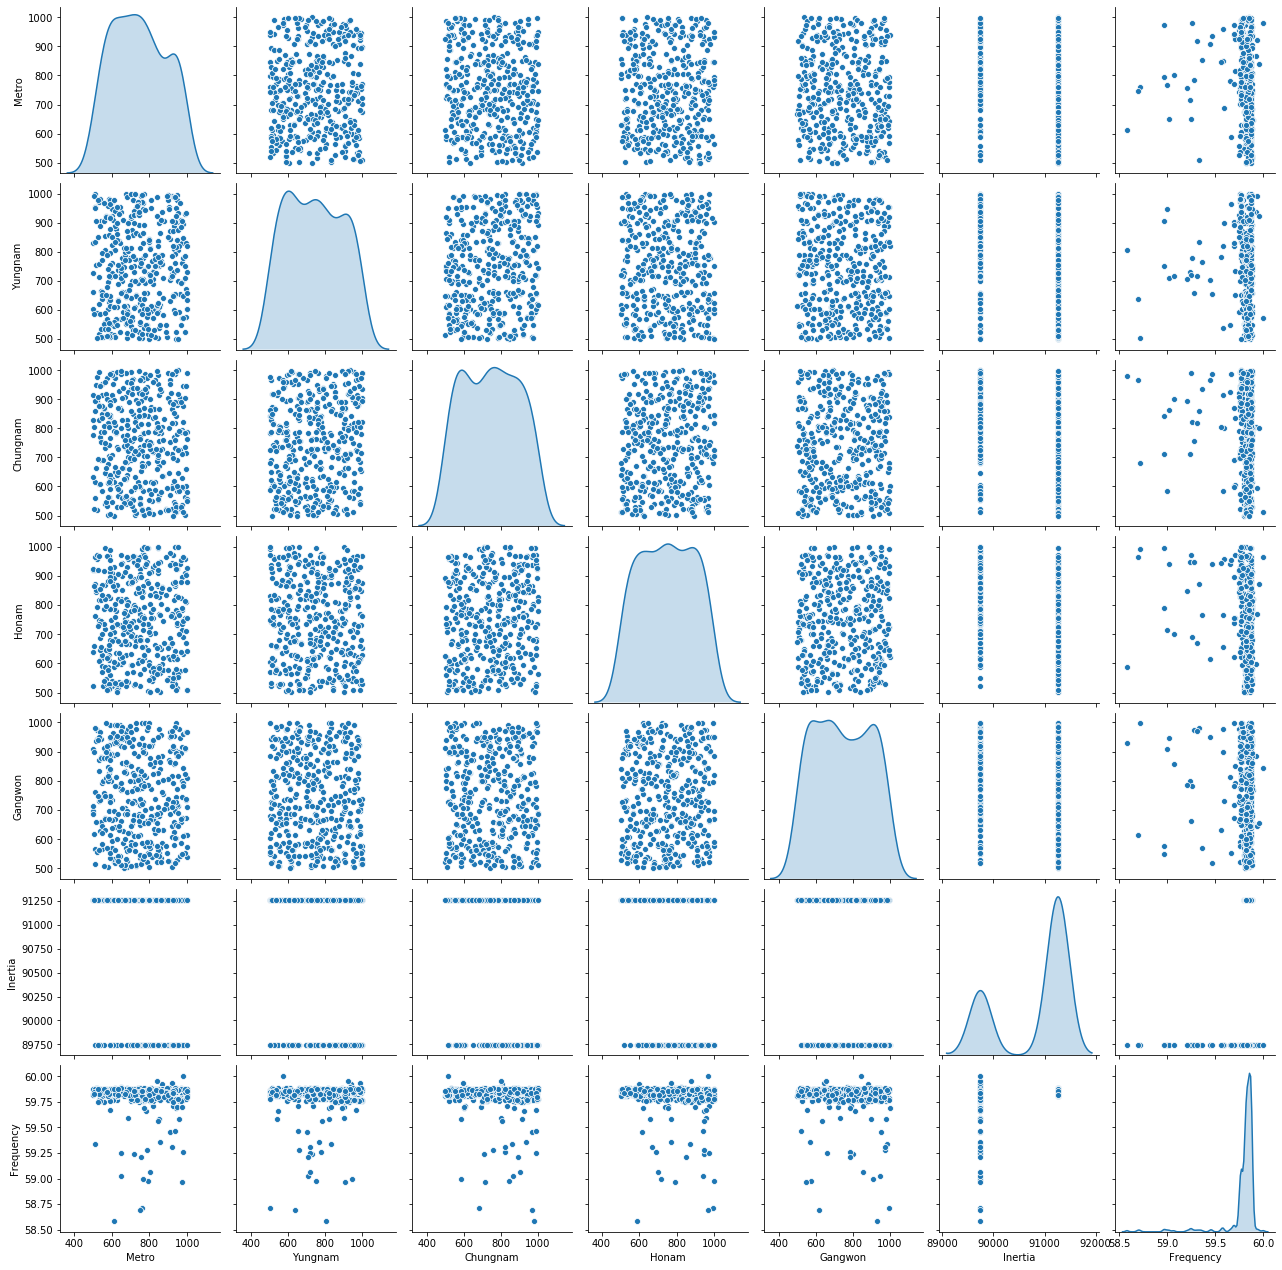

In [237]:
sns.pairplot(train_dataset[["Metro", "Yungnam", "Chungnam","Honam", "Gangwon", "Inertia", "Frequency"]], diag_kind="kde")

In [365]:
train_stats = train_dataset.describe()
train_stats.pop("Frequency")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Metro,468.0,462.805556,268.406876,0.0,227.50,460.5,711.50,910.0
Yungnam,468.0,1810.239316,1072.735197,0.0,878.75,1747.0,2825.25,3550.0
Chungnam,468.0,489.555556,285.071228,1.0,244.75,488.0,726.25,999.0
Honam,468.0,2071.521368,1269.887267,0.0,976.75,2081.0,3202.00,4345.0
Gangwon,468.0,707.284188,405.048608,0.0,373.50,714.0,1058.25,1402.0


In [366]:
train_labels = train_dataset.pop('Frequency') #Frequency
test_labels = test_dataset.pop('Frequency')

In [367]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']     #std =standard deviation 표준편차 
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [368]:
normed_train_data 

,Metro,Yungnam,Chungnam,Honam,Gangwon
246,0.157203,1.621799,-1.327933,-0.397296,-0.756166
92,-0.420278,1.425105,-0.928033,-1.302101,-0.504345
517,-1.120707,1.381292,0.955707,-0.624875,0.693042
186,-1.381505,1.459597,-0.896462,-0.339811,-0.138957
390,0.924695,-1.423687,1.611683,0.042113,1.330003
...,...,...,...,...,...
3,0.652720,1.408326,0.334809,-0.945376,-0.299431
481,-1.478373,-0.598693,-1.657675,-1.432821,-0.366090
125,-0.345764,0.004438,1.716920,-1.228079,-0.055016
280,1.159413,1.173412,-0.721067,1.763526,0.932520


In [369]:
def build_model():
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dropout(0.1),
        layers.Dense(5, activation='relu'),
        layers.Dense(1),
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse','accuracy',])
    return model

In [370]:
model = build_model()

In [371]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 10)                60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [372]:
example_batch = normed_train_data[:10]
example_batch

,Metro,Yungnam,Chungnam,Honam,Gangwon
246,0.157203,1.621799,-1.327933,-0.397296,-0.756166
92,-0.420278,1.425105,-0.928033,-1.302101,-0.504345
517,-1.120707,1.381292,0.955707,-0.624875,0.693042
186,-1.381505,1.459597,-0.896462,-0.339811,-0.138957
390,0.924695,-1.423687,1.611683,0.042113,1.330003
103,-0.614014,-1.150554,0.022606,1.603669,1.231249
508,-1.549161,-0.929623,0.706646,-0.861904,0.051144
14,-1.511904,-0.553016,-1.492804,1.200483,-1.091929
52,-0.893440,-0.095307,0.517220,0.852421,1.591700
498,-1.049919,-0.173612,0.868009,-1.312338,-0.474719


In [373]:
example_result = model.predict(example_batch)         #predict method
example_result

array([[-0.09696001],
       [-0.03351297],
       [ 1.3333514 ],
       [-0.13779092],
       [-0.08395033],
       [-0.45077914],
       [-0.33272627],
       [-0.6214199 ],
       [-0.27452904],
       [ 0.28904873]], dtype=float32)

In [374]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 2000
# validation_split 은 20퍼센트가 tsst가 된다
history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [375]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
1995,0.037988,0.104987,0.037988,0.0,0.086954,0.141357,0.086954,0.0,1995
1996,0.039574,0.106228,0.039574,0.0,0.085760,0.162939,0.085760,0.0,1996
1997,0.037893,0.106329,0.037893,0.0,0.084678,0.147686,0.084678,0.0,1997
1998,0.040684,0.104431,0.040684,0.0,0.086700,0.141478,0.086700,0.0,1998
1999,0.043270,0.108744,0.043270,0.0,0.085823,0.146965,0.085823,0.0,1999


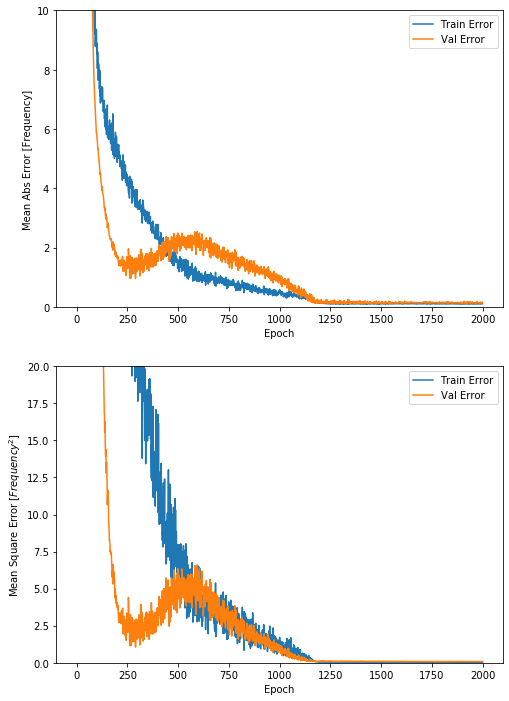

In [379]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Frequency]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,10])
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Frequency^2$]')
    
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [198]:
'''model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


'''

"model = build_model()\n\n# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다\nearly_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)\n\nhistory = model.fit(normed_train_data, train_labels, epochs=EPOCHS,\n                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])\n\nplot_history(history)\n\n\n"

In [377]:
loss, mae, mse , accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} Frequency".format(mae))

117/117 - 0s - loss: 0.0546 - mae: 0.1383 - mse: 0.0546 - accuracy: 0.0000e+00
테스트 세트의 평균 절대 오차:  0.14 Frequency


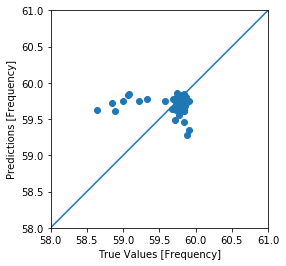

In [378]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Frequency]')
plt.ylabel('Predictions [Frequency]')
plt.axis('equal')
plt.axis('square')
plt.xlim([58,61])
plt.ylim([58,61])
_ = plt.plot([-1000, 1000], [-1000, 1000])


In [64]:
print(test_labels)

9      59.817591
25     59.747630
28     59.875087
31     59.773650
32     59.854352
         ...    
472    59.819289
482    59.877235
483    59.852657
486    59.838178
498    59.873778
Name: Frequency, Length: 100, dtype: float64


In [22]:
print(test_predictions)

[59.76182  59.699844 59.70872  59.72465  59.754475 59.475567 59.711132
 59.845856 60.242424 59.3172   59.72208  59.734188 60.31131  59.686924
 59.747147 59.71397  59.674305 59.769726 59.749817 59.775204 59.708065
 59.312717 59.86808  59.74434  60.051586 59.662426 59.574013 59.75394
 59.754906 59.945694 59.66027  59.731834 59.458557 59.77832  59.71023
 59.51312  59.516083 59.7961   59.72531  59.79506  59.855015 59.773144
 59.7936   59.71411  59.811268 59.62182  59.733543 59.73543  59.661617
 59.744583 59.608475 59.893574 59.682426 59.686054 59.701214 59.615902
 59.72284  59.788567 59.649437 60.40161  59.781578 59.208027 59.732292
 59.782894 59.768112 59.798744 59.75571  59.778725 59.48884  59.78979
 59.662136 59.545498 59.729332 59.76761  59.394913 59.90581  59.70374
 59.659645 60.13409  59.729145 59.70376  59.738277 59.724823 59.751274
 59.30717  59.776344 59.829784 59.45952  59.89835  59.55851  59.77161
 59.696335 59.762306 59.743893 60.104847 60.080585 59.720486 59.79745
 59.661327 5

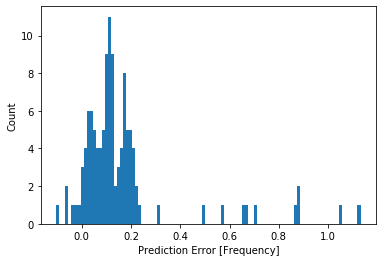

In [314]:
error = test_predictions - test_labels
plt.hist(error, bins = 100
        )
plt.xlabel("Prediction Error [Frequency]")
_ = plt.ylabel("Count")